In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv("trump_tweets.csv")
df.head()

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,...,location,full_text_lower,stopword,full_text_clean,punct_token,lemma,cluster,pca1,pca2,removed
0,https://x.com/AxjXNews/status/1855036310030860325,https://twitter.com/AxjXNews/status/1855036310...,1855036310030860288,https://t.co/fn06q81lyD https://t.co/d87lHXsy...,1,0,3,0,Fri Nov 08 23:54:55 +0000 2024,0,...,"West Hollywood, CA",https://t.co/fn06q81lyd https://t.co/d87lhxsy...,https://t.co/fn06q81lyd https://t.co/d87lhxsy9...,"['https', 't', 'co', 'https', 't', 'co', 'isra...","['https', 't', 'co', 'https', 't', 'co', 'isra...",http t co http t co israel iraniansstandwithtr...,1,-0.018189,-0.021686,israel iraniansstandwithtrump hezbollah analys...
1,https://x.com/grabbbz/status/1855036307212271683,https://twitter.com/grabbbz/status/18550363072...,1855036307212271616,Protectionism never works for good reason - in...,0,0,0,0,Fri Nov 08 23:54:55 +0000 2024,0,...,NaN,protectionism never works for good reason - in...,protectionism never works good reason - inflat...,"['protectionism', 'never', 'works', 'good', 'r...","['protectionism', 'never', 'works', 'good', 'r...",protectionism never work good reason inflation...,1,-0.072923,-0.009275,protectionism never work good reason inflation...
2,https://x.com/ROMULUS7078/status/1855036075586...,https://twitter.com/ROMULUS7078/status/1855036...,1855036075586339072,@wakeupnj Unacceptable. All by design! #FireTh...,0,0,2,0,Fri Nov 08 23:53:59 +0000 2024,0,...,Soprano State,@wakeupnj unacceptable. all by design! #fireth...,@wakeupnj unacceptable. design! #firethemall #...,"['wakeupnj', 'unacceptable', 'design', 'fireth...","['wakeupnj', 'unacceptable', 'design', 'fireth...",wakeupnj unacceptable design firethemall,1,-0.095262,0.004810,wakeupnj unacceptable design firethemall
3,https://x.com/israr4ever/status/18550355864168...,https://twitter.com/israr4ever/status/18550355...,1855035586416869632,Two brave leaders &amp; friends soon after att...,0,0,0,0,Fri Nov 08 23:52:03 +0000 2024,0,...,NaN,two brave leaders &amp; friends soon after att...,two brave leaders &amp; friends soon attempt #...,"['two', 'brave', 'leaders', 'amp', 'friends', ...","['two', 'brave', 'leaders', 'amp', 'friends', ...",two brave leader amp friend soon attempt imran...,1,-0.007832,0.121186,two brave leader friend soon attempt imrankhan...
4,https://x.com/haymansafc/status/18550350704087...,https://twitter.com/haymansafc/status/18550350...,1855035070408716800,Hopefully Trump will be able to find them the ...,0,0,0,0,Fri Nov 08 23:50:00 +0000 2024,0,...,United Kingdom,hopefully trump will be able to find them the ...,hopefully trump able find psychological help c...,"['hopefully', 'trump', 'able', 'find', 'psycho...","['hopefully', 'trump', 'able', 'find', 'psycho...",hopefully trump able find psychological help c...,1,-0.049505,-0.039618,hopefully able find psychological help clearly...


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Get compound scores for each review and store in a new column
df['compound_score'] = df['lemma'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

df[['lemma', 'compound_score']]

,lemma,compound_score
0,http t co http t co israel iraniansstandwithtr...,0.9442
1,protectionism never work good reason inflation...,-0.2278
2,wakeupnj unacceptable design firethemall,-0.4588
3,two brave leader amp friend soon attempt imran...,0.7650
4,hopefully trump able find psychological help c...,0.7964
...,...,...
35592,biden say factual might stumble word he s smar...,-0.7096
35593,what world respect u s jan trump clown like or...,0.6808
35594,dont understand wtf bydone talk im muslim im i...,0.4717
35595,donaldjtrumpjr hilarious,0.4019


In [3]:
# Function to label sentiment based on compound score with adjustable thresholds
def label_sentiment(compound_score, pos_threshold=0.1, neg_threshold=-0.1):
    if compound_score >= pos_threshold:
        return 'Positive'
    elif compound_score <= neg_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the labeling function to the 'compound_score' column
df['sentiment'] = df['compound_score'].apply(
    lambda x: label_sentiment(x, pos_threshold=0.1, neg_threshold=-0.1)
)
df[['lemma', 'compound_score','sentiment']]

,lemma,compound_score,sentiment
0,http t co http t co israel iraniansstandwithtr...,0.9442,Positive
1,protectionism never work good reason inflation...,-0.2278,Negative
2,wakeupnj unacceptable design firethemall,-0.4588,Negative
3,two brave leader amp friend soon attempt imran...,0.7650,Positive
4,hopefully trump able find psychological help c...,0.7964,Positive
...,...,...,...
35592,biden say factual might stumble word he s smar...,-0.7096,Negative
35593,what world respect u s jan trump clown like or...,0.6808,Positive
35594,dont understand wtf bydone talk im muslim im i...,0.4717,Positive
35595,donaldjtrumpjr hilarious,0.4019,Positive


In [4]:
df['sentiment'].value_counts()

Positive    15250
Neutral     10509
Negative     9838
Name: sentiment, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35597 entries, 0 to 35596
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              35597 non-null  object 
 1   twitterUrl       35597 non-null  object 
 2   id               35597 non-null  int64  
 3   text             35597 non-null  object 
 4   retweetCount     35597 non-null  int64  
 5   replyCount       35597 non-null  int64  
 6   likeCount        35597 non-null  int64  
 7   quoteCount       35597 non-null  int64  
 8   createdAt        35597 non-null  object 
 9   bookmarkCount    35597 non-null  int64  
 10  isRetweet        35597 non-null  bool   
 11  isQuote          35597 non-null  bool   
 12  location         24097 non-null  object 
 13  full_text_lower  35597 non-null  object 
 14  stopword         35597 non-null  object 
 15  full_text_clean  35597 non-null  object 
 16  punct_token      35597 non-null  object 
 17  lemma       

In [6]:
df = df.dropna(subset=['removed'])

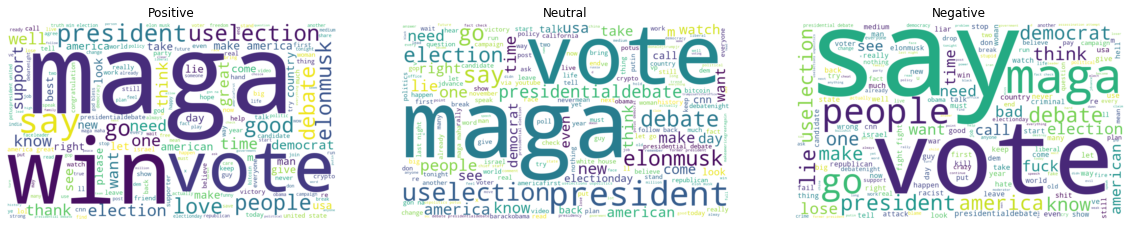

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 词云图
def generate_wordcloud(text):
    return WordCloud(width=1000, height=600, background_color='white').generate(text)

# 根据 sentiment 标签生成词云图并合成一张图
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    text = ' '.join(df[df['sentiment'] == sentiment]['removed'])
    wordcloud = generate_wordcloud(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(sentiment)

# 显示合成图
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35540 entries, 0 to 35596
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              35540 non-null  object 
 1   twitterUrl       35540 non-null  object 
 2   id               35540 non-null  int64  
 3   text             35540 non-null  object 
 4   retweetCount     35540 non-null  int64  
 5   replyCount       35540 non-null  int64  
 6   likeCount        35540 non-null  int64  
 7   quoteCount       35540 non-null  int64  
 8   createdAt        35540 non-null  object 
 9   bookmarkCount    35540 non-null  int64  
 10  isRetweet        35540 non-null  bool   
 11  isQuote          35540 non-null  bool   
 12  location         24060 non-null  object 
 13  full_text_lower  35540 non-null  object 
 14  stopword         35540 non-null  object 
 15  full_text_clean  35540 non-null  object 
 16  punct_token      35540 non-null  object 
 17  lemma       

In [10]:
df = df.dropna(subset=['location'])

In [11]:
df['location']

0        West Hollywood, CA
2            Soprano State 
4            United Kingdom
5                 Sheffield
6                   Crypto 
                ...        
35590           Kansas, USA
35591       Los Angeles, CA
35593             Neverland
35595          Singapore 🇸🇬
35596    kingtrey456《《《《 IG
Name: location, Length: 24060, dtype: object

In [12]:
df = df[['lemma','location', 'compound_score', 'sentiment']]

In [13]:
df

,lemma,location,compound_score,sentiment
0,http t co http t co israel iraniansstandwithtr...,"West Hollywood, CA",0.9442,Positive
2,wakeupnj unacceptable design firethemall,Soprano State,-0.4588,Negative
4,hopefully trump able find psychological help c...,United Kingdom,0.7964,Positive
5,new evidence donald trump fascist trumpmeltdow...,Sheffield,-0.5574,Negative
6,bro bro don t settle less always plan b amster...,Crypto,0.0000,Neutral
...,...,...,...,...
35590,i m sorry pro biden can t anymore family commi...,"Kansas, USA",-0.4019,Negative
35591,trump answer january question presidentialdeba...,"Los Angeles, CA",0.0000,Neutral
35593,what world respect u s jan trump clown like or...,Neverland,0.6808,Positive
35595,donaldjtrumpjr hilarious,Singapore 🇸🇬,0.4019,Positive


In [14]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium

# A simplified mapping of US states to their central latitude and longitude
us_states = {
    "Alabama": (32.806671, -86.791130),
    "Alaska": (61.370716, -152.404419),
    "Arizona": (33.729759, -111.431221),
    "Arkansas": (34.969704, -92.373123),
    "California": (36.116203, -119.681564),
    "Colorado": (39.059811, -105.311104),
    "Connecticut": (41.597782, -72.755371),
    "Delaware": (39.318523, -75.507141),
    "Florida": (27.766279, -81.686783),
    "Georgia": (33.040619, -83.643074),
    "Hawaii": (21.094318, -157.498337),
    "Idaho": (44.240459, -114.478828),
    "Illinois": (40.349457, -88.986137),
    "Indiana": (39.849426, -86.258278),
    "Iowa": (42.011539, -93.210526),
    "Kansas": (38.526600, -96.726486),
    "Kentucky": (37.668140, -84.670067),
    "Louisiana": (31.169546, -91.867805),
    "Maine": (44.693947, -69.381927),
    "Maryland": (39.063946, -76.802101),
    "Massachusetts": (42.230171, -71.530106),
    "Michigan": (43.326618, -84.536095),
    "Minnesota": (45.694454, -93.900192),
    "Mississippi": (32.741646, -89.678696),
    "Missouri": (38.456085, -92.288368),
    "Montana": (46.921925, -110.454353),
    "Nebraska": (41.125370, -98.268082),
    "Nevada": (38.313515, -117.055374),
    "New Hampshire": (43.452492, -71.563896),
    "New Jersey": (40.298904, -74.521011),
    "New Mexico": (34.840515, -106.248482),
    "New York": (42.165726, -74.948051),
    "North Carolina": (35.630066, -79.806419),
    "North Dakota": (47.528912, -99.784012),
    "Ohio": (40.388783, -82.764915),
    "Oklahoma": (35.565342, -96.928917),
    "Oregon": (44.572021, -122.070938),
    "Pennsylvania": (40.590752, -77.209755),
    "Rhode Island": (41.680893, -71.511780),
    "South Carolina": (33.856892, -80.945007),
    "South Dakota": (44.299782, -99.438828),
    "Tennessee": (35.747845, -86.692345),
    "Texas": (31.054487, -97.563461),
    "Utah": (40.150032, -111.862434),
    "Vermont": (44.045876, -72.710686),
    "Virginia": (37.769337, -78.169968),
    "Washington": (47.400902, -121.490494),
    "West Virginia": (38.491226, -80.954454),
    "Wisconsin": (44.268543, -89.616508),
    "Wyoming": (42.755966, -107.302490),
}

# Map the locations to states
def map_to_state(location):
    for state in us_states.keys():
        if state.lower() in location.lower():
            return state
    return None
# Function to geocode locations to latitude and longitude
geolocator = Nominatim(user_agent="geoapi")

def geocode_location(location):
    try:
        geo_data = geolocator.geocode(location, timeout=10)
        if geo_data:
            return geo_data.latitude, geo_data.longitude
    except GeocoderTimedOut:
        return None
    return None

df['state'] = df['location'].apply(map_to_state)

# Add latitude and longitude based on state
df['latitude'] = df['state'].map(lambda x: us_states[x][0] if x else None)
df['longitude'] = df['state'].map(lambda x: us_states[x][1] if x else None)

# Filter for valid rows with a mapped state
us_data = df.dropna(subset=['state', 'latitude', 'longitude'])

# Filter data for unique and meaningful US-based locations and geocode them
unique_locations = us_data['location'].dropna().unique()[:50]  # Limit to 50 for geocoding
location_coordinates = {loc: geocode_location(loc) for loc in unique_locations}

# Convert results to a DataFrame
geo_results = pd.DataFrame.from_dict(location_coordinates, orient='index', columns=['latitude', 'longitude'])
geo_results = geo_results.dropna()  # Drop failed geocodes

# Merge geocoded data back to main dataset
us_data['coordinates'] = us_data['location'].map(location_coordinates)
us_data[['latitude', 'longitude']] = pd.DataFrame(us_data['coordinates'].tolist(), index=us_data.index)

C:\Users\86189\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\86189\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# Filter for valid rows with a mapped state
us_data = df.dropna(subset=['state', 'latitude', 'longitude'])
us_data

,lemma,location,compound_score,sentiment,state,latitude,longitude
23,u come king u best miss omar http t co,Florida,0.5574,Positive,Florida,27.766279,-81.686783
28,say never wish country run ground regardless p...,"New Jersey, USA",0.3699,Positive,New Jersey,40.298904,-74.521011
42,realdonaldtrump president elect trump even off...,"College Station, Texas",0.5859,Positive,Texas,31.054487,-97.563461
49,early voting begin past four year teach us any...,"Washington, DC",0.6369,Positive,Washington,47.400902,-121.490494
68,can t wait republican lose shit whenever take ...,"Washington, USA",-0.7430,Negative,Washington,47.400902,-121.490494
...,...,...,...,...,...,...,...
35567,can t believe trumps answer everything especia...,New York City,0.0000,Neutral,New York,42.165726,-74.948051
35580,course trump blame two woman january,"Washington, DC",-0.3400,Negative,Washington,47.400902,-121.490494
35582,trump lie everything happen january,"Youngstown, Ohio",0.0000,Neutral,Ohio,40.388783,-82.764915
35584,trump right thing shift january biden s crappy...,"Virginia, USA",-0.5574,Negative,Virginia,37.769337,-78.169968


In [16]:
df.state.value_counts()

New York          542
California        492
Texas             451
Florida           444
Washington        323
Colorado          178
Ohio              170
Virginia          146
Michigan          145
Arizona           131
Georgia           110
North Carolina    110
Pennsylvania      101
New Jersey         94
Indiana            86
Tennessee          73
Massachusetts      71
South Carolina     70
Arkansas           68
Utah               60
Illinois           58
Maryland           57
Kansas             55
Alabama            54
Louisiana          50
Oregon             48
Oklahoma           47
Minnesota          43
Idaho              41
Missouri           39
Wisconsin          37
Connecticut        36
New Mexico         33
Maine              28
Kentucky           27
Wyoming            23
Mississippi        22
Rhode Island       22
Iowa               18
New Hampshire      18
Nevada             17
Alaska             17
Nebraska           12
Delaware           11
North Dakota        9
Hawaii    

## 各州聚合情绪数值

In [17]:
import folium
from folium import Choropleth
import pandas as pd

# 聚合数据
state_sentiment = us_data.groupby("state", as_index=False).agg(
    avg_sentiment=("compound_score", "mean")
)

# 加载 GeoJSON 数据
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

# 创建基础地图
m = folium.Map(location=[37.8, -96], zoom_start=4)

# 添加热力图层
Choropleth(
    geo_data=geojson_url,
    name="choropleth",
    data=state_sentiment,
    columns=["state", "avg_sentiment"],
    key_on="feature.properties.name",  # 匹配 GeoJSON 的州名字段
    fill_color="RdYlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Sentiment Score",
).add_to(m)

# 保存地图或展示
m.save("trump_sentiment_map.html")  # 保存为 HTML 文件
m

C:\Users\86189\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


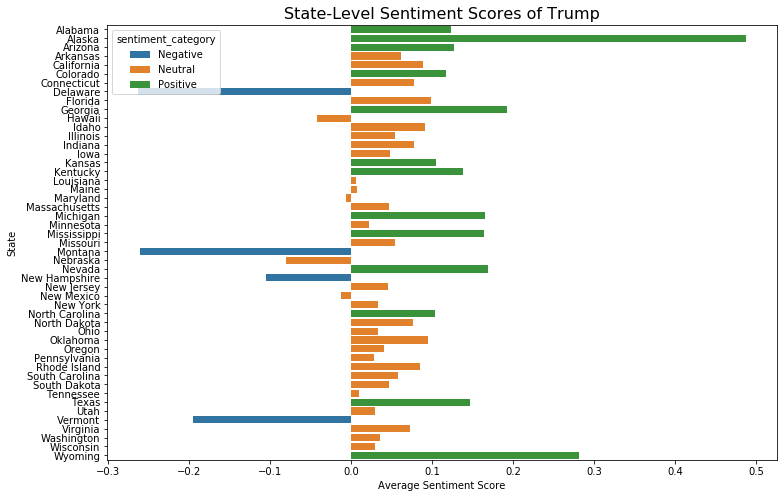

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 数据准备：按州聚合并分箱
state_sentiment = us_data.groupby("state", as_index=False).agg(
    avg_sentiment=("compound_score", "mean")
)
state_sentiment["sentiment_category"] = pd.cut(
    state_sentiment["avg_sentiment"], bins=[-1, -0.1, 0.1, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# 绘制条形图
plt.figure(figsize=(12, 8))
sns.barplot(data=state_sentiment, y="state", x="avg_sentiment", hue="sentiment_category", dodge=False)
plt.title("State-Level Sentiment Scores of Trump", fontsize=16)
plt.xlabel("Average Sentiment Score")
plt.ylabel("State")
plt.show()